# Training the model using the preprocessed data

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
from utils import save_model
from model_training import get_untrained_custom_model, train_model, get_train_dataset, get_val_dataset, plot_training_history

2024-07-06 12:52:16.239636: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
check_tensorflow()
#making sure the gpu is available
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



Num GPUs Available:  1


2024-07-06 12:52:17.612674: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-07-06 12:52:18.562115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-06 12:52:18.562169: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-07-06 12:52:18.562233: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-07-06 12:52:18.574747: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-07-06 12:52:18.575030: I tensorflow/str

In [3]:
# Setting up variables and hyperparameters
#variables
model_type = 'custom_untrained'

train_dir = '../datasets/ready/train'
val_dir = '../datasets/ready/val'
save_path = '../models'
image_height = 28
image_width = 28
should_train = True
augmentation = False

# hyperparameter
batch_size = 64
epochs = 16
optimizer='adam'
loss='categorical_crossentropy' 
metrics=['accuracy']

In [4]:
# getting the traing and validation datasets
train_dataset = get_train_dataset(train_dir, batch_size, image_width, image_height, augmentation)
val_dataset = get_val_dataset(val_dir, batch_size, image_width, image_height, augmentation)

Found 49012 files belonging to 10 classes.


2024-07-06 12:52:23.859508: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-06 12:52:23.861558: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-06 12:52:23.861609: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-07-06 12:52:23.861775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node

Found 10494 files belonging to 10 classes.


In [5]:
# Getting the model
if model_type == 'custom_untrained':
    model = get_untrained_custom_model(image_width, image_height, optimizer=optimizer, loss=loss, metrics=metrics)

In [6]:
# Training the model
# if should_train == True:
history = train_model(model, train_dataset, epochs, val_dataset)

Epoch 1/16


2024-07-06 12:52:26.988802: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-07-06 12:52:26.991268: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2495995000 Hz
2024-07-06 12:52:27.271916: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-07-06 12:52:28.326877: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2024-07-06 12:52:29.455116: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-06 12:52:29.455188: W tensorflow/stream_executor/gpu/asm_compiler.cc:56] Couldn't invoke ptxas --version
2024-07-06 12:52:29.535924: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-06 12:52:29.536099: W tensorflow/stream_executor/gpu/redzone_allocator.cc:31

766/766 [==============================] - 39s 46ms/step - loss: 1.1100 - accuracy: 0.6679 - val_loss: 0.1530 - val_accuracy: 0.9680
Epoch 2/16
766/766 [==============================] - 37s 47ms/step - loss: 0.2786 - accuracy: 0.9240 - val_loss: 0.1012 - val_accuracy: 0.9785
Epoch 3/16
766/766 [==============================] - 38s 49ms/step - loss: 0.1976 - accuracy: 0.9476 - val_loss: 0.0882 - val_accuracy: 0.9805
Epoch 4/16
766/766 [==============================] - 39s 51ms/step - loss: 0.1518 - accuracy: 0.9602 - val_loss: 0.0837 - val_accuracy: 0.9831
Epoch 5/16
766/766 [==============================] - 39s 50ms/step - loss: 0.1366 - accuracy: 0.9643 - val_loss: 0.0785 - val_accuracy: 0.9828
Epoch 6/16
766/766 [==============================] - 47s 62ms/step - loss: 0.1156 - accuracy: 0.9696 - val_loss: 0.0730 - val_accuracy: 0.9834
Epoch 7/16
766/766 [==============================] - 40s 52ms/step - loss: 0.1091 - accuracy: 0.9711 - val_loss: 0.0895 - val_accuracy: 0.9808
Epo

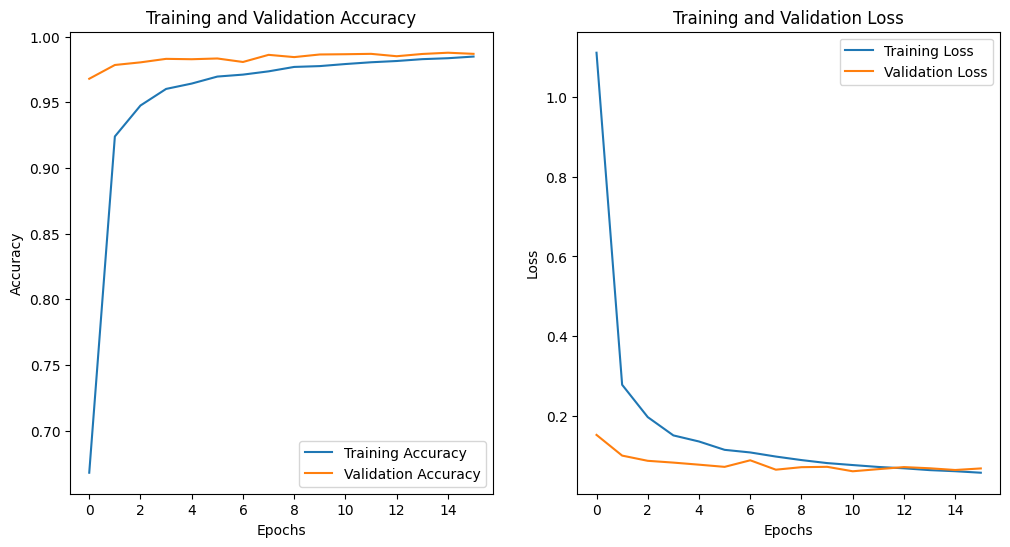

In [7]:
# Ploting training and validation info
plot_training_history(history)

In [8]:
# Saving the model
save_model(model, save_path)

2024-07-06 13:02:50.225106: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../models/assets
